# Tutorial: Embedding SSML in PNG Images with Python Pillow

This tutorial demonstrates how to embed Speech Synthesis Markup Language (SSML) data into PNG images using Python's Pillow library. This is useful for storing text-to-speech instructions alongside images for accessibility, educational content, or multimedia applications.

## What is SSML?

SSML (Speech Synthesis Markup Language) is an XML-based markup language that provides control over aspects of speech such as:
- Pronunciation
- Volume, pitch, and rate
- Pauses and emphasis
- Audio insertion

## Why Embed SSML in Images?

- **Accessibility**: Store audio descriptions with images
- **Educational Content**: Include pronunciation guides with diagrams
- **Multimedia Projects**: Keep speech instructions with visual assets
- **Self-contained Files**: No need for separate metadata files

## Prerequisites

First, let's install and import the required libraries:

In [1]:
# Install Pillow if not already installed
# !pip install Pillow

from PIL import Image, PngImagePlugin
import io

## Part 1: Creating a Sample Image

Let's create a simple image to work with:

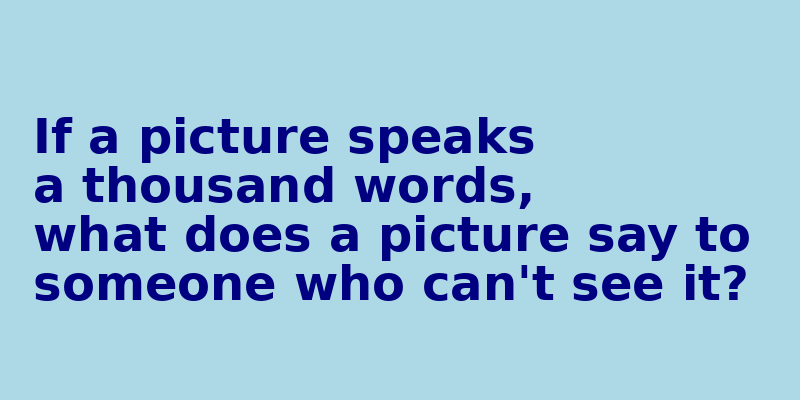

In [3]:
from PIL import ImageDraw, ImageFont

# Create a sample image with text
width, height = 800, 400
image = Image.new('RGB', (width, height), color='lightblue')
draw = ImageDraw.Draw(image)

# Add some text to the image
text = "If a picture speaks \na thousand words, \nwhat does a picture say to \nsomeone who can't see it?"
try:
    # Try to use a nice font
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 48)
except:
    # Fall back to default font
    font = ImageFont.load_default()

# Calculate text position (center)
bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]
x = (width - text_width) / 2
y = (height - text_height) / 2

draw.text((x, y), text, fill='navy', font=font)

# Display the image
image

## Part 2: Creating SSML Content

Now let's create some SSML markup that describes how to read the image content:

In [4]:
# Create SSML markup for the image
ssml_content = """<?xml version="1.0" encoding="UTF-8"?>
<speak version="1.1" xmlns="http://www.w3.org/2001/10/synthesis"
       xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xsi:schemaLocation="http://www.w3.org/2001/10/synthesis
                 http://www.w3.org/TR/speech-synthesis11/synthesis.xsd"
       xml:lang="en-US">
    <prosody rate="medium" pitch="medium">
        <emphasis level="strong">Welcome</emphasis> to 
        <break time="200ms"/>
        <prosody rate="slow">
            <say-as interpret-as="characters">SSML</say-as>
        </prosody>
        Tutorial.
    </prosody>
    <break time="500ms"/>
    <p>
        If a picture speaks a thousand words, what does a picture say to someone who can't see it?
    </p>
</speak>"""

print("SSML Content:")
print(ssml_content)

SSML Content:
<?xml version="1.0" encoding="UTF-8"?>
<speak version="1.1" xmlns="http://www.w3.org/2001/10/synthesis"
       xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xsi:schemaLocation="http://www.w3.org/2001/10/synthesis
                 http://www.w3.org/TR/speech-synthesis11/synthesis.xsd"
       xml:lang="en-US">
    <prosody rate="medium" pitch="medium">
        <emphasis level="strong">Welcome</emphasis> to 
        <break time="200ms"/>
        <prosody rate="slow">
            <say-as interpret-as="characters">SSML</say-as>
        </prosody>
        Tutorial.
    </prosody>
    <break time="500ms"/>
    <p>
        If a picture speaks a thousand words, what does a picture say to someone who can't see it?
    </p>
</speak>


## Part 3: Embedding SSML into PNG Metadata

PNG files support text chunks (tEXt, zTXt, iTXt) for storing metadata. We'll use the PngInfo class to embed our SSML:

Image saved to: ./image_with_ssml.png
SSML metadata has been embedded!


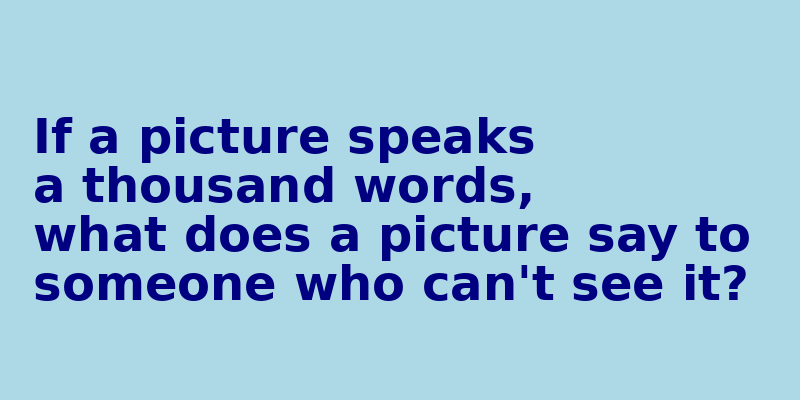

In [6]:
# Create PNG metadata object
pnginfo = PngImagePlugin.PngInfo()

# Add SSML as metadata
pnginfo.add_text("SSML", ssml_content)

# Add additional metadata
pnginfo.add_text("Description", "Tutorial image with embedded SSML markup")
pnginfo.add_text("Author", "Python Pillow Tutorial")
pnginfo.add_text("Creation-Date", "2025-09-30")

# Save the image with embedded SSML
output_path = "./image_with_ssml.png"
image.save(output_path, "PNG", pnginfo=pnginfo)

print(f"Image saved to: {output_path}")
print("SSML metadata has been embedded!")

# Display the image
image

## Part 4: Reading SSML from PNG

Now let's verify that we can read the SSML back from the image:

In [7]:
# Load the image
loaded_image = Image.open(output_path)

# Extract metadata
metadata = loaded_image.info

print("All metadata in the image:")
print("-" * 50)
for key, value in metadata.items():
    if key == "SSML":
        print(f"\n{key}:")
        print(value)
    else:
        print(f"\n{key}: {value}")

All metadata in the image:
--------------------------------------------------

SSML:
<?xml version="1.0" encoding="UTF-8"?>
<speak version="1.1" xmlns="http://www.w3.org/2001/10/synthesis"
       xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xsi:schemaLocation="http://www.w3.org/2001/10/synthesis
                 http://www.w3.org/TR/speech-synthesis11/synthesis.xsd"
       xml:lang="en-US">
    <prosody rate="medium" pitch="medium">
        <emphasis level="strong">Welcome</emphasis> to 
        <break time="200ms"/>
        <prosody rate="slow">
            <say-as interpret-as="characters">SSML</say-as>
        </prosody>
        Tutorial.
    </prosody>
    <break time="500ms"/>
    <p>
        If a picture speaks a thousand words, what does a picture say to someone who can't see it?
    </p>
</speak>

Description: Tutorial image with embedded SSML markup

Author: Python Pillow Tutorial

Creation-Date: 2025-09-30


## Part 5: Advanced Example - Multiple Languages

Let's create a more complex example with multilingual SSML:

In [ ]:
# Create a more complex image
multilingual_image = Image.new('RGB', (800, 400), color='lightgreen')
draw = ImageDraw.Draw(multilingual_image)

text_lines = [
    "Hello - English",
    "Bonjour - Français",
    "Hola - Español"
]

try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 32)
except:
    font = ImageFont.load_default()

y_offset = 100
for line in text_lines:
    draw.text((50, y_offset), line, fill='darkgreen', font=font)
    y_offset += 80

# Create multilingual SSML
multilingual_ssml = """<?xml version="1.0" encoding="UTF-8"?>
<speak version="1.1" xmlns="http://www.w3.org/2001/10/synthesis"
       xml:lang="en-US">
    <p xml:lang="en-US">
        <emphasis>Hello</emphasis> - English
    </p>
    <break time="500ms"/>
    <p xml:lang="fr-FR">
        <emphasis>Bonjour</emphasis> - Français
    </p>
    <break time="500ms"/>
    <p xml:lang="es-ES">
        <emphasis>Hola</emphasis> - Español
    </p>
</speak>"""

# Embed the SSML
pnginfo_multi = PngImagePlugin.PngInfo()
pnginfo_multi.add_text("SSML", multilingual_ssml)
pnginfo_multi.add_text("Languages", "en, fr, es")
pnginfo_multi.add_text("Type", "Multilingual Tutorial")

multilingual_path = "./multilingual_ssml.png"
multilingual_image.save(multilingual_path, "PNG", pnginfo=pnginfo_multi)

print(f"Multilingual image saved to: {multilingual_path}")
multilingual_image

## Part 6: Helper Functions

Let's create some reusable functions for working with SSML in PNGs:

In [ ]:
def embed_ssml_in_png(image, ssml_content, output_path, additional_metadata=None):
    """
    Embed SSML content into a PNG image.
    
    Args:
        image: PIL Image object
        ssml_content: SSML markup as string
        output_path: Path to save the PNG file
        additional_metadata: Dictionary of additional metadata key-value pairs
    
    Returns:
        Path to the saved image
    """
    pnginfo = PngImagePlugin.PngInfo()
    pnginfo.add_text("SSML", ssml_content)
    
    if additional_metadata:
        for key, value in additional_metadata.items():
            pnginfo.add_text(key, value)
    
    image.save(output_path, "PNG", pnginfo=pnginfo)
    return output_path


def extract_ssml_from_png(image_path):
    """
    Extract SSML content from a PNG image.
    
    Args:
        image_path: Path to the PNG file
    
    Returns:
        Dictionary with 'ssml' and 'metadata' keys
    """
    img = Image.open(image_path)
    metadata = img.info
    
    result = {
        'ssml': metadata.get('SSML', None),
        'metadata': {k: v for k, v in metadata.items() if k != 'SSML'}
    }
    
    return result


def validate_ssml(ssml_content):
    """
    Basic validation of SSML content.
    
    Args:
        ssml_content: SSML markup as string
    
    Returns:
        Boolean indicating if SSML appears valid
    """
    import xml.etree.ElementTree as ET
    
    try:
        root = ET.fromstring(ssml_content)
        # Check if root element is 'speak'
        if root.tag.endswith('speak'):
            return True
        return False
    except ET.ParseError:
        return False


print("Helper functions defined successfully!")

## Part 7: Using the Helper Functions

Let's test our helper functions:

In [ ]:
# Create a new image
test_image = Image.new('RGB', (600, 300), color='coral')
draw = ImageDraw.Draw(test_image)
draw.text((150, 130), "Test Image", fill='white')

# Create SSML
test_ssml = """<?xml version="1.0"?>
<speak version="1.1" xmlns="http://www.w3.org/2001/10/synthesis" xml:lang="en-US">
    <prosody rate="slow" pitch="low">
        This is a <emphasis level="strong">test image</emphasis> with embedded SSML.
    </prosody>
</speak>"""

# Validate SSML
if validate_ssml(test_ssml):
    print("✓ SSML is valid")
else:
    print("✗ SSML is invalid")

# Embed SSML
test_path = "./test_ssml_image.png"
embed_ssml_in_png(
    test_image,
    test_ssml,
    test_path,
    additional_metadata={
        "Title": "Test Image",
        "Category": "Tutorial Example"
    }
)
print(f"\n✓ Image saved to: {test_path}")

# Extract SSML
extracted = extract_ssml_from_png(test_path)
print("\n--- Extracted Data ---")
print(f"\nSSML Content:\n{extracted['ssml'][:100]}...")
print(f"\nOther Metadata:\n{extracted['metadata']}")

test_image

## Part 8: Real-World Use Case - Educational Diagram

Let's create a practical example with a diagram and detailed SSML instructions:

In [ ]:
# Create an educational diagram
diagram = Image.new('RGB', (800, 600), color='white')
draw = ImageDraw.Draw(diagram)

# Draw a simple water cycle diagram
colors = {
    'ocean': 'lightblue',
    'sun': 'gold',
    'cloud': 'lightgray',
    'rain': 'blue'
}

# Ocean
draw.rectangle([50, 450, 750, 550], fill=colors['ocean'], outline='navy', width=3)
draw.text((350, 490), "Ocean", fill='navy')

# Sun
draw.ellipse([600, 50, 700, 150], fill=colors['sun'], outline='orange', width=2)
draw.text((625, 95), "Sun", fill='darkgoldenrod')

# Cloud
draw.ellipse([300, 200, 500, 280], fill=colors['cloud'], outline='gray', width=2)
draw.text((370, 230), "Cloud", fill='black')

# Arrows
draw.text((200, 350), "Evaporation ↑", fill='red')
draw.text((500, 350), "Precipitation ↓", fill='blue')

# Educational SSML
educational_ssml = """<?xml version="1.0"?>
<speak version="1.1" xmlns="http://www.w3.org/2001/10/synthesis" xml:lang="en-US">
    <p>
        <emphasis level="strong">The Water Cycle</emphasis>
    </p>
    <break time="500ms"/>
    
    <p>
        This diagram illustrates the water cycle, a continuous process that circulates water 
        throughout Earth's atmosphere, land, and oceans.
    </p>
    <break time="300ms"/>
    
    <p>
        Step <say-as interpret-as="cardinal">1</say-as>: 
        <emphasis>Evaporation.</emphasis>
        <break time="200ms"/>
        The <prosody rate="slow">sun</prosody> heats water in the ocean, 
        causing it to turn into water vapor and rise into the atmosphere.
    </p>
    <break time="400ms"/>
    
    <p>
        Step <say-as interpret-as="cardinal">2</say-as>: 
        <emphasis>Condensation.</emphasis>
        <break time="200ms"/>
        Water vapor cools as it rises, forming <prosody rate="slow">clouds</prosody>.
    </p>
    <break time="400ms"/>
    
    <p>
        Step <say-as interpret-as="cardinal">3</say-as>: 
        <emphasis>Precipitation.</emphasis>
        <break time="200ms"/>
        Water droplets in clouds become heavy and fall as rain, returning to the ocean.
    </p>
    <break time="500ms"/>
    
    <p>
        <prosody rate="slow" pitch="low">
            And the cycle continues...
        </prosody>
    </p>
</speak>"""

# Save with SSML
educational_path = "./water_cycle_diagram.png"
embed_ssml_in_png(
    diagram,
    educational_ssml,
    educational_path,
    additional_metadata={
        "Title": "The Water Cycle",
        "Subject": "Earth Science",
        "Grade Level": "Elementary",
        "Accessible": "true"
    }
)

print(f"Educational diagram saved to: {educational_path}")
diagram

## Part 9: Batch Processing

Create a function to batch process multiple images with SSML:

In [ ]:
def batch_embed_ssml(image_ssml_pairs, output_dir="./"):
    """
    Batch process multiple images with SSML.
    
    Args:
        image_ssml_pairs: List of tuples (image, ssml_content, filename, metadata_dict)
        output_dir: Directory to save processed images
    
    Returns:
        List of saved file paths
    """
    import os
    
    saved_paths = []
    
    for img, ssml, filename, metadata in image_ssml_pairs:
        if validate_ssml(ssml):
            output_path = os.path.join(output_dir, filename)
            embed_ssml_in_png(img, ssml, output_path, metadata)
            saved_paths.append(output_path)
            print(f"✓ Processed: {filename}")
        else:
            print(f"✗ Invalid SSML for: {filename}")
    
    return saved_paths

print("Batch processing function ready!")

## Part 10: Summary and Best Practices

### Key Takeaways:

1. **PNG Metadata**: PNG files can store text metadata using the PngInfo class
2. **SSML Embedding**: SSML can be embedded as a text chunk in PNG files
3. **Accessibility**: This technique enables accessible, self-contained image files
4. **Validation**: Always validate SSML before embedding

### Best Practices:

- Keep SSML concise but descriptive
- Use proper SSML markup for pronunciation and pacing
- Include metadata about language and content type
- Test SSML with TTS engines before finalizing
- Consider file size when embedding large SSML content

### Use Cases:

- **Educational Materials**: Diagrams with audio descriptions
- **Accessibility Tools**: Images with built-in screen reader instructions
- **Multimedia Projects**: Self-contained visual and audio assets
- **Documentation**: Technical diagrams with pronunciation guides
- **Language Learning**: Images with pronunciation instructions

## Bonus: Extracting and Using SSML with TTS

Here's how you might use the extracted SSML with a text-to-speech library:

In [ ]:
# Example of how to use extracted SSML (requires additional TTS libraries)
def demonstrate_ssml_extraction_workflow(png_path):
    """
    Demonstrate extracting SSML and preparing it for TTS use.
    """
    # Extract SSML
    data = extract_ssml_from_png(png_path)
    ssml = data['ssml']
    
    if ssml:
        print("SSML extracted successfully!")
        print(f"\nSSML length: {len(ssml)} characters")
        
        # Validate
        if validate_ssml(ssml):
            print("✓ SSML is valid and ready for TTS processing")
            
            # This is where you would pass the SSML to a TTS engine:
            # Example (pseudo-code):
            # tts_engine.speak_ssml(ssml)
            # or
            # audio_file = tts_engine.synthesize_ssml(ssml, output="audio.mp3")
            
            print("\nSSML can be used with TTS engines like:")
            print("  - Amazon Polly")
            print("  - Google Cloud Text-to-Speech")
            print("  - Microsoft Azure Speech Service")
            print("  - pyttsx3 (local)")
        else:
            print("✗ SSML validation failed")
    else:
        print("No SSML found in image")

# Test with our educational diagram
print("Testing SSML extraction workflow:")
print("=" * 50)
demonstrate_ssml_extraction_workflow(educational_path)

## Conclusion

You now know how to:
- Embed SSML markup into PNG images using Pillow
- Extract SSML from PNG files
- Validate SSML content
- Create reusable helper functions
- Apply this technique to real-world use cases

This technique opens up new possibilities for creating accessible, self-contained multimedia content!

### Next Steps:
- Integrate with actual TTS engines
- Create a GUI tool for educators
- Build a library of accessible educational images
- Explore other metadata types (JSON, custom schemas)